# 📊 Exploring PM2.5 Concentrations and Socio-Demographic Index (SDI)

This notebook explores the relationship between ambient PM2.5 concentrations and the Socio-demographic Index (SDI) across 25 countries from 2010 to 2019. The dataset used here is a merged version of country-level annual PM2.5 concentration data and mean SDI values for the same countries and years.

### 🔍 Objectives

- Describe how PM2.5 levels have changed over time for each country.
- Understand how PM2.5 concentrations vary across countries with different levels of socio-demographic development.
- Categorize countries into SDI tiers (Low, Medium, High) to compare pollution exposure patterns.
- Visualize the distribution and trend of air pollution in relation to SDI, as a first step toward linking environmental exposure to disease burden.

merged dataset : [`merged_sdi_pm25_data.csv`](../1_datasets/cleaned_datasets/merged_sdi_pm25_data.csv)

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to ensure consistent style
sns.set(style="whitegrid")


### 📁 Dataset Preview

This dataset contains country-level annual PM2.5 concentration data merged with Socio-Demographic Index (SDI) values from 2010 to 2019.

In [18]:
pm25_sdi = pd.read_csv("../1_datasets/cleaned_datasets/merged_sdi_pm25_data.csv")

# Preview the data
pm25_sdi.head()


,Country,Year,PM25 concentration,PM25 lower bound,PM25 upper bound,SDI mean value
0,Germany,2019,10.73,10.56,10.93,0.899703
1,Japan,2019,10.84,10.02,11.55,0.867148
2,Brazil,2019,10.94,9.37,13.01,0.645298
3,Kenya,2019,12.52,7.80,17.78,0.508004
4,Romania,2019,13.30,12.55,14.10,0.760284


### Data Integrity Check

We confirm that the merged dataset has no duplicated rows.

In [19]:
pm25_sdi.info()

pm25_sdi.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             250 non-null    object 
 1   Year                250 non-null    int64  
 2   PM25 concentration  250 non-null    float64
 3   PM25 lower bound    250 non-null    float64
 4   PM25 upper bound    250 non-null    float64
 5   SDI mean value      250 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.8+ KB


0

### 📊 Descriptive Statistics 

We summarize the distribution of PM2.5 concentrations and SDI across all countries and years. This gives us insight into variability and potential outliers.

In [20]:
pm25_sdi[["PM25 concentration", "SDI mean value"]].describe()

,PM25 concentration,SDI mean value
count,250.000000,250.000000
mean,26.481720,0.661235
std,19.685479,0.173271
min,6.310000,0.247760
25%,11.720000,0.542884
50%,18.785000,0.672991
75%,47.737500,0.801312
max,72.180000,0.899703


Text(0.5, 0.98, 'PM2.5 Concentration per Country (2010–2019)')

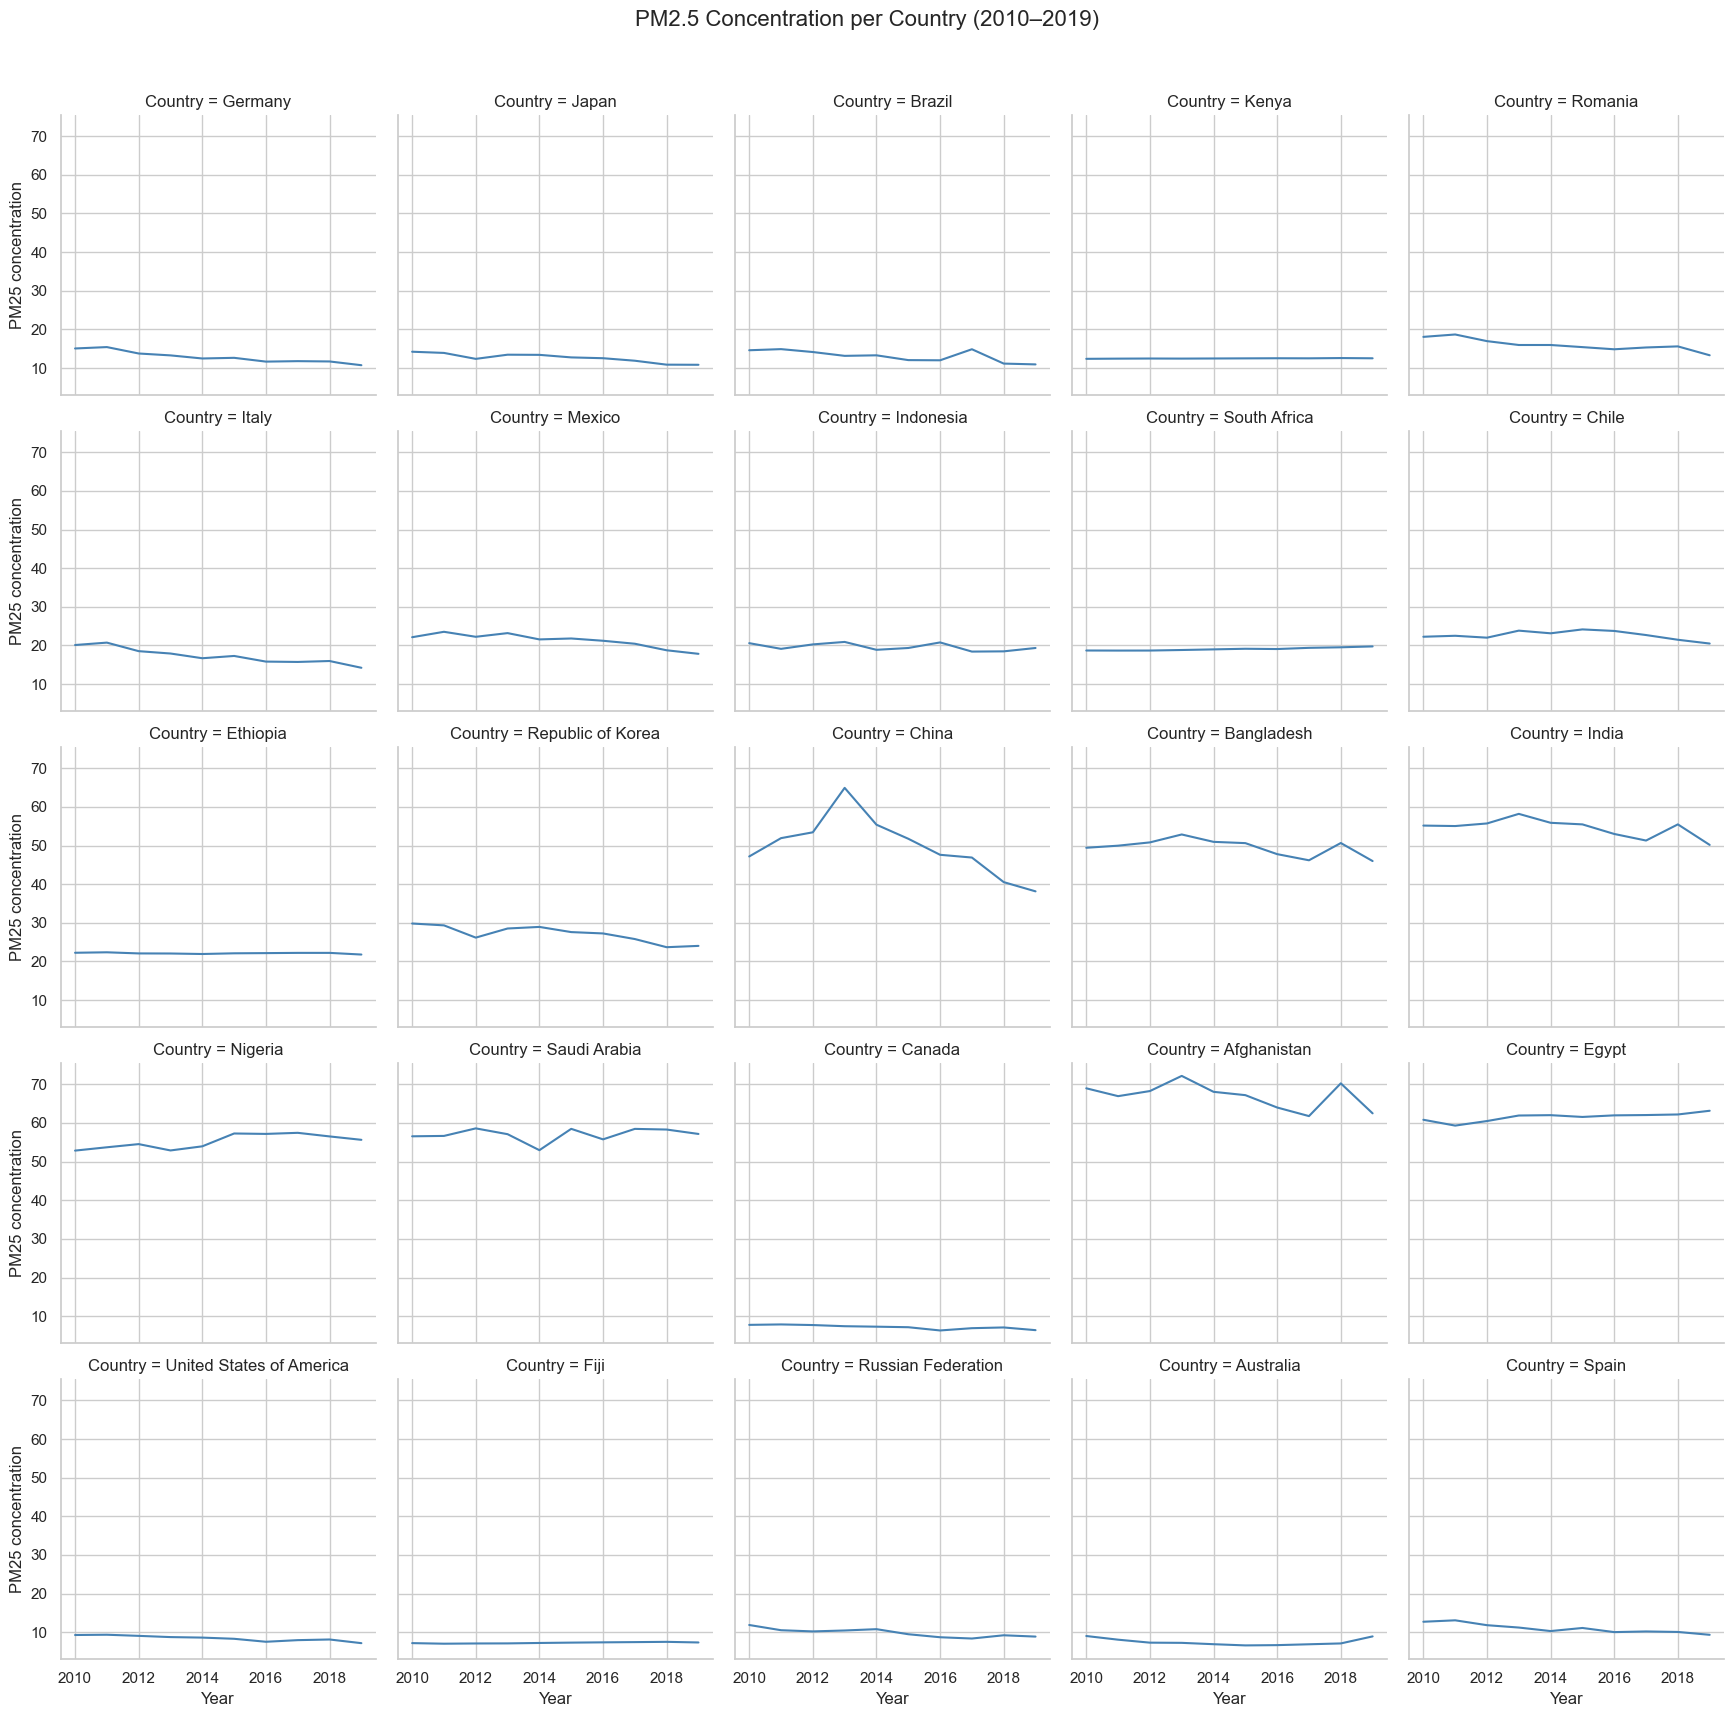

In [21]:
g = sns.FacetGrid(pm25_sdi, col="Country", col_wrap=5, height=3.5, sharey=True)
g.map(sns.lineplot, "Year", "PM25 concentration", color="steelblue")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("PM2.5 Concentration per Country (2010–2019)", fontsize=16)


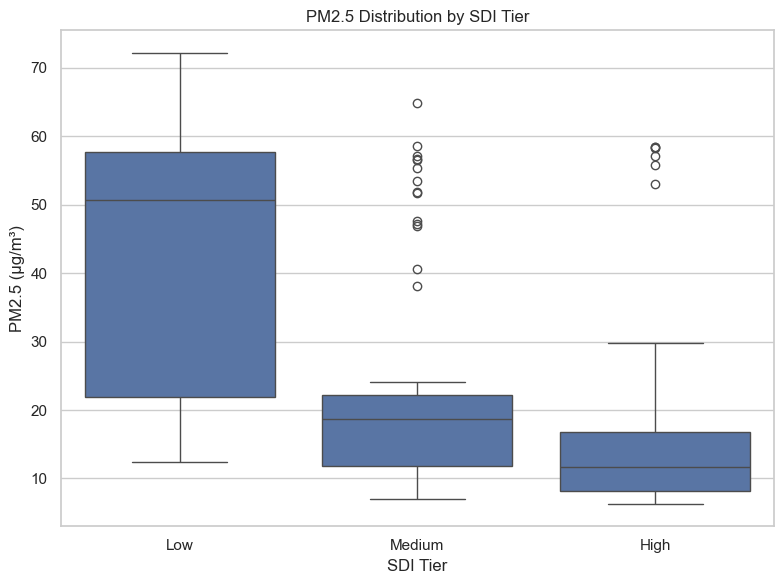

In [22]:
# Categorize SDI into tiers
pm25_sdi["SDI_Tier"] = pd.qcut(pm25_sdi["SDI mean value"], q=3, labels=["Low", "Medium", "High"])

# Boxplot: PM2.5 distribution by SDI Tier
plt.figure(figsize=(8, 6))
sns.boxplot(data=pm25_sdi, x="SDI_Tier", y="PM25 concentration")
plt.title("PM2.5 Distribution by SDI Tier")
plt.xlabel("SDI Tier")
plt.ylabel("PM2.5 (µg/m³)")
plt.tight_layout()
plt.show()


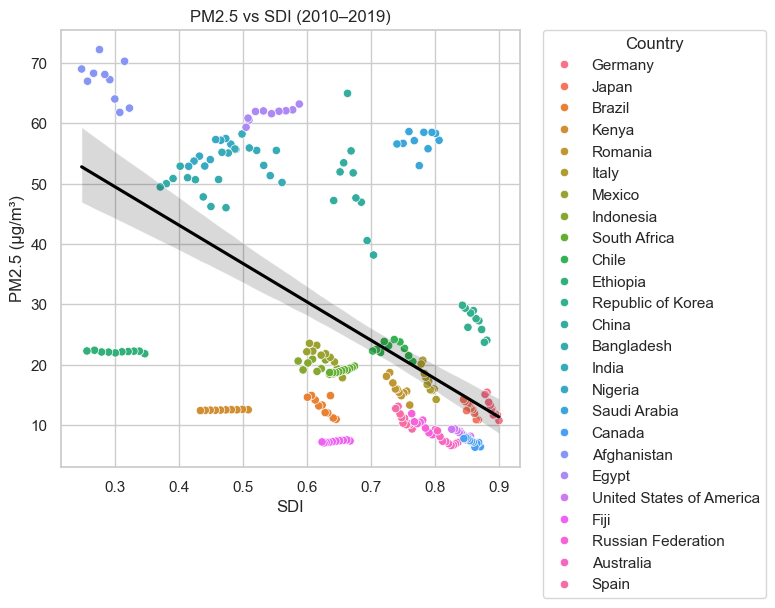

In [23]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=pm25_sdi, x="SDI mean value", y="PM25 concentration", hue="Country"
)
sns.regplot(
    data=pm25_sdi,
    x="SDI mean value",
    y="PM25 concentration",
    scatter=False,
    color="black",
)

plt.title("PM2.5 vs SDI (2010–2019)")
plt.xlabel("SDI")
plt.ylabel("PM2.5 (µg/m³)")

plt.legend(
    bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, title="Country"
)

plt.tight_layout()
plt.show()
